<a href="https://colab.research.google.com/github/santiagoramirez10/ai4eng_project_ForestCoverType/blob/main/02%20Algoritmos%20clasificadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Los datos usados son de la página Kaggle y se pueden encontrar en el siguiente enlace: https://www.kaggle.com/competitions/forest-cover-type-prediction

Para obtener los datos y hacerlos disponibles en los notebooks cuando se ejecutan en Colab se deben realizar los siguientes pasos:



* Creación de API Token: para descargar los archivos desde el cuaderno de Jupyter se debe crear un token desde tu cuenta de Kaggle. Este procedimiento se realiza yendo a la configuración de tu perfil y luego das click en "Create New API Token" y se descargará un archivo kaggle.json donde se encuentra tu nombre de usuario y el token, ambos los necesitarás para descargar los archivos.

* Aceptación de las reglas de la competencia: también es obligatorio aceptar las reglas de la competencia. Estas reglas se encuentran en https://www.kaggle.com/competitions/forest-cover-type-prediction/rules. Si este proceso no se realiza, la descarga se prohíbe y no es posible acceder a los archivos desde acá, deberán ser descargados entonces.  

Una vez se hayan realizado estos dos pasos, con este bloque de código se pueden descargar los archivos.

In [ ]:
!pip install opendatasets
import opendatasets as od
dataset_link="https://www.kaggle.com/competitions/forest-cover-type-prediction/data?select=sampleSubmission.csv"
od.download(dataset_link)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: santiagoramirez10
Your Kaggle Key: ··········


100%|██████████| 25.3M/25.3M [00:00<00:00, 40.5MB/s]



Extracting archive ./forest-cover-type-prediction/forest-cover-type-prediction.zip to ./forest-cover-type-prediction


Luego, se debe acceder al directorio en donde se encuentran los archivos descargados y ahí si se podrán trabajar sobre ellos. También se muestran todos los archivos contenidos en la carpeta descargada.

In [ ]:
import os
os.chdir("forest-cover-type-prediction")
os.listdir()

['sampleSubmission.csv',
 'sampleSubmission.csv.zip',
 'test.csv',
 'test3.csv',
 'train.csv.zip',
 'test.csv.zip',
 'train.csv']

Se importa la librería pandas y se leen los archivos de entrenamiento y de prueba respectivamente.

In [ ]:
import pandas as pd
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

Se muestran los primeros elementos del archivo de entrenamiento.

In [ ]:
df_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


Se muestran los primeros elementos del archivo de prueba.

In [ ]:
df_test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


Se importan las librerías necesarias para realizar el algoritmo de clasificación.

In [ ]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

Se realizan diferentes modelos con las librerías previamente incluídas para conocer su exactitud, precisión, memoria y la puntuación.

In [ ]:
def classification_(X,y):
    g=GaussianNB()
    b=BernoulliNB()
    k=KNeighborsClassifier()
    svc=SVC()
    d=DecisionTreeClassifier()
    log=LogisticRegression()
    gbc=GradientBoostingClassifier()
    rf=RandomForestClassifier()
    ab=AdaBoostClassifier()
    X=X
    y=y
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)
    algos=[g,b,k,svc,d,log,gbc,rf,ab]
    algos_name=['Gaussian','Bernoulli','KNeigbors','SVC','DecisionTree','LogisticRegr','GradientBoosting','RandomForest','AdaBoost'] 
    accuracy = []
    precision = []
    recall = []
    f1 = []
    result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)
    for i in algos: 
        predict=i.fit(x_train,y_train).predict(x_test) 
        accuracy.append(accuracy_score(y_test,predict))
        precision.append(precision_score(y_test,predict,average='micro'))
        recall.append(recall_score(y_test,predict,average='micro'))
        f1.append(f1_score(y_test,predict,average='micro'))
    result.AccuracyScore=accuracy
    result.PrecisionScore=precision
    result.RecallScore=recall
    result.f1_Score=f1
    return result.sort_values('f1_Score',ascending=False)

Para evitar errores, cada que se haga un algoritmo de clasificación se leerá de nuevo el archivo, esto no consume memoria considerable y ayudar a que el algoritmo sea más preciso a la hora de dar sus resultados.

In [ ]:
df_train=pd.read_csv("train.csv")
X=df_train.drop(["Id","Cover_Type"],axis=1)
y=df_train['Cover_Type']

Se imprime un dataframe con los 9 tipos de clasificadores y sus caracteríasticas.

In [ ]:
classification_(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,AccuracyScore,PrecisionScore,RecallScore,f1_Score
RandomForest,0.872685,0.872685,0.872685,0.872685
KNeigbors,0.804894,0.804894,0.804894,0.804894
GradientBoosting,0.802579,0.802579,0.802579,0.802579
DecisionTree,0.793651,0.793651,0.793651,0.793651
SVC,0.625661,0.625661,0.625661,0.625661
Bernoulli,0.610780,0.610780,0.610780,0.610780
Gaussian,0.600860,0.600860,0.600860,0.600860
LogisticRegr,0.474537,0.474537,0.474537,0.474537
AdaBoost,0.346561,0.346561,0.346561,0.346561


Hasta ahora no hay nada nuevo respecto al código <a href="https://github.com/santiagoramirez10/ai4eng_project_ForestCoverType/blob/main/01%20Lectura%20y%20analisis%20de%20datos.ipynb">01 Lectura y analisis de datos.ipynb</a>. Realizamos una seride gráficas para algunos de los clasificadores que nos permitirán analizar su comportamiento y el porqué del orden de la tabla anterior. Por practicidad se toman el primer y último clasificador de la tabla y algunos entre medio para conocer dicho comportamiento.



Se importan matplotlib y numpy

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df_train=pd.read_csv("train.csv")
X=df_train.drop(["Id","Cover_Type"],axis=1)
y=df_train['Cover_Type']
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

El primer clasificador es RandomForest. Es el algoritmocon mayor puntaje y vamos a mirar su comportamiento.

In [ ]:
df_train=pd.read_csv("train.csv")
X=df_train.drop(["Id","Cover_Type"],axis=1)
y=df_train['Cover_Type']
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

Se crea una instancia del clasificador Random Forest, luego se entrena el modelo, se obtienen datos con caracterísitcas, importancia, nombres y se ordenan dependiendo de la  importancia que tenga en el modelo.

Se grafican las 10 características más importantes.

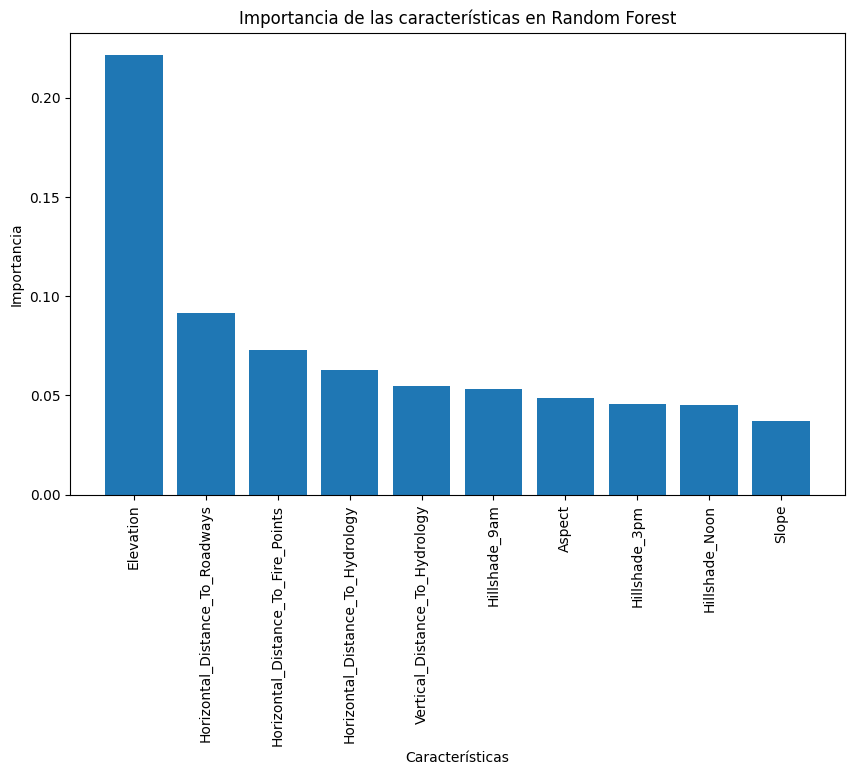

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = rf.feature_importances_[:10]
feature_names = X_train.columns[:10]
indices = np.argsort(importances)[::-1][:10]
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las características en Random Forest')
plt.show()

Ahora hacemos una matriz de confusión que nos permitirá observar las diferentes predicciones que realizó el clasificador.

Primero se realizan predicciones en el conjunto de prueba, luego se calcula la matriz de confusión y finalmente se grafica.

Se muestran los nombres de los tipos de corteza correspondientes a los números de la gráfica.

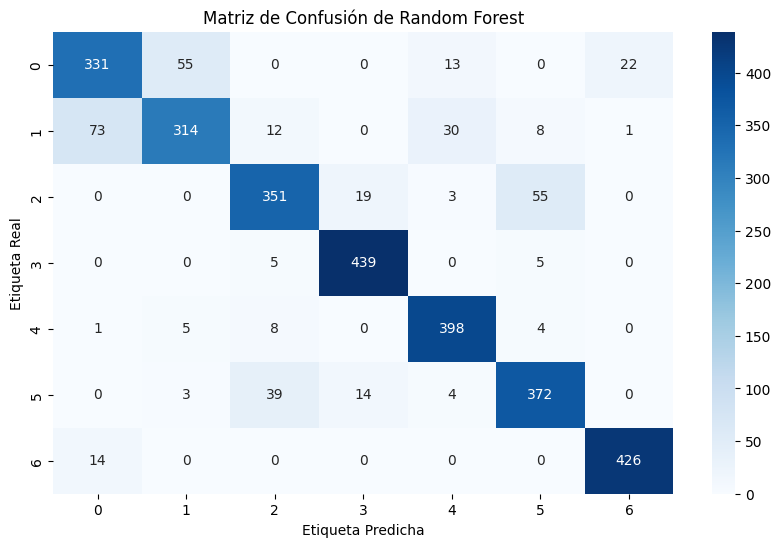


Tipos:
0. Spruce/Fir
1. Lodgepole Pine
2. Ponderosa Pine
3. Cottonwood/Willow
4. Aspen
5. Douglas-fir
6. Krummholz


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión de Random Forest')
plt.show()
print("\nTipos:")
Tipos=["0. Spruce/Fir","1. Lodgepole Pine","2. Ponderosa Pine", "3. Cottonwood/Willow", "4. Aspen", "5. Douglas-fir","6. Krummholz"]
for tipo in Tipos:
  print(tipo)

El siguiente es **KNeigbors**.

Se grafica la matriz de confusión para K vecinos.

In [ ]:
df_train=pd.read_csv("train.csv")
X=df_train.drop(["Id","Cover_Type"],axis=1)
y=df_train['Cover_Type']
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

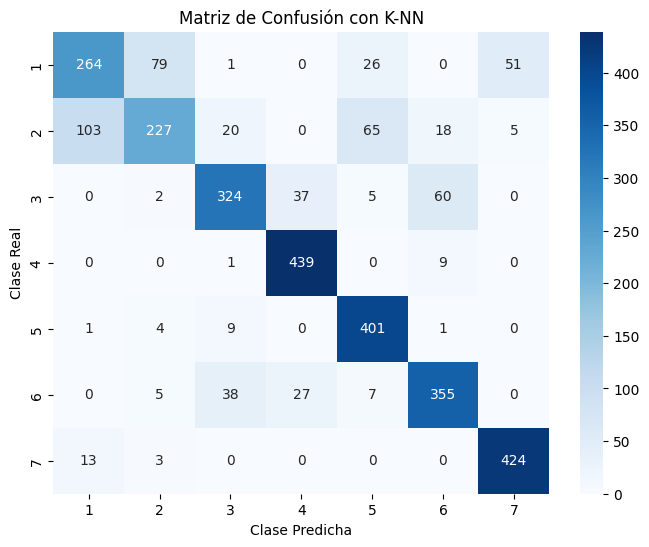


Tipos:
0. Spruce/Fir
1. Lodgepole Pine
2. Ponderosa Pine
3. Cottonwood/Willow
4. Aspen
5. Douglas-fir
6. Krummholz

Matriz de confusión: 
[[264  79   1   0  26   0  51]
 [103 227  20   0  65  18   5]
 [  0   2 324  37   5  60   0]
 [  0   0   1 439   0   9   0]
 [  1   4   9   0 401   1   0]
 [  0   5  38  27   7 355   0]
 [ 13   3   0   0   0   0 424]]


In [ ]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(x_test)
labels = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión con K-NN')
plt.show()
print("\nTipos:")
Tipos=["0. Spruce/Fir","1. Lodgepole Pine","2. Ponderosa Pine", "3. Cottonwood/Willow", "4. Aspen", "5. Douglas-fir","6. Krummholz"]
for tipo in Tipos:
  print(tipo)
print("\nMatriz de confusión: ")
print(cm)

Ahora se grafica la curva de aprendizaje.Al ser un archivo tan grande puede tardar un minuto en ejecutarse.

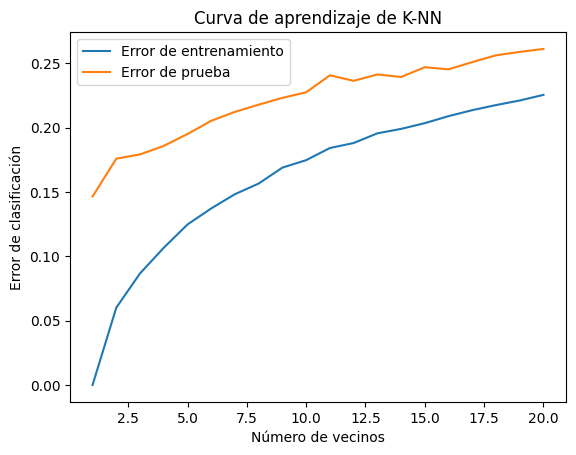

In [ ]:
neighbors = np.arange(1, 21)
train_errors = []
test_errors = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_errors.append(1 - knn.score(X_train, y_train))
    test_errors.append(1 - knn.score(x_test, y_test))
plt.plot(neighbors, train_errors, label='Error de entrenamiento')
plt.plot(neighbors, test_errors, label='Error de prueba')
plt.xlabel('Número de vecinos')
plt.ylabel('Error de clasificación')
plt.title('Curva de aprendizaje de K-NN')
plt.legend()
plt.show()

El siguiente clasificador es Bernoulli.

Se crea grafica una matriz de probabilidades. Primero se crea una instancia del clasificador, luego se ajusta a los datos, se obtiene la matriz de probabilidades estimadas y por último se grafica la matriz.

In [ ]:
df_train=pd.read_csv("train.csv")
X=df_train.drop(["Id","Cover_Type"],axis=1)
y=df_train['Cover_Type']
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

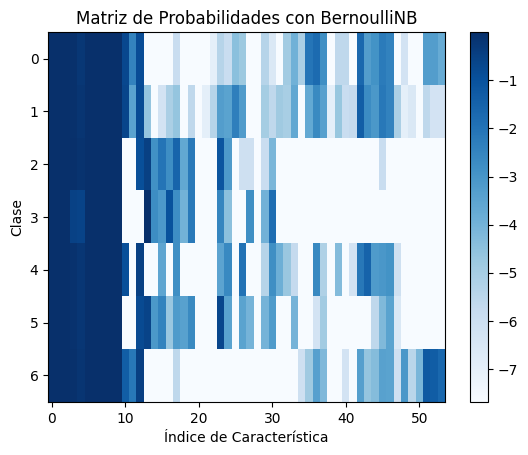

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X, y)
probability_matrix = bernoulli_nb.feature_log_prob_
plt.imshow(probability_matrix, cmap='Blues', aspect='auto')
plt.colorbar()
plt.xlabel('Índice de Característica')
plt.ylabel('Clase')
plt.title('Matriz de Probabilidades con BernoulliNB')
plt.show()

Tenemos ahora a **Logistic Regression**.

In [ ]:
df_train=pd.read_csv("train.csv")
X=df_train.drop(["Id","Cover_Type"],axis=1)
y=df_train['Cover_Type']
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

Creamos una matriz de confusión para analizar las predicciones.

Como la matriz graficada presenta numeros con exponentes, se muestra la matriz con los datos numéricos.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


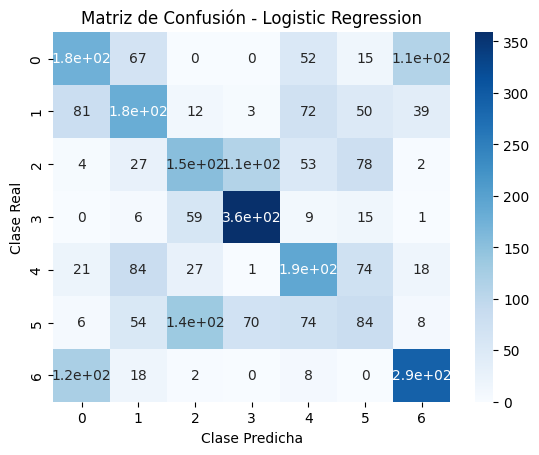


Tipos:
0. Spruce/Fir
1. Lodgepole Pine
2. Ponderosa Pine
3. Cottonwood/Willow
4. Aspen
5. Douglas-fir
6. Krummholz

Matriz de confusión: 
[[176  67   0   0  52  15 111]
 [ 81 181  12   3  72  50  39]
 [  4  27 153 111  53  78   2]
 [  0   6  59 359   9  15   1]
 [ 21  84  27   1 191  74  18]
 [  6  54 136  70  74  84   8]
 [121  18   2   0   8   0 291]]


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(x_test)
confusion_mat = confusion_matrix(y_test, y_pred)
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion_mat, annot=True, cmap="Blues")
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión - Logistic Regression')
plt.show()
print("\nTipos:")
Tipos=["0. Spruce/Fir","1. Lodgepole Pine","2. Ponderosa Pine", "3. Cottonwood/Willow", "4. Aspen", "5. Douglas-fir","6. Krummholz"]
for tipo in Tipos:
  print(tipo)
print("\nMatriz de confusión: ")
print(confusion_mat)

Por último tenemos el clasificador **Adaboost**, este es el de menor puntaje.

In [ ]:
df_train=pd.read_csv("train.csv")
X=df_train.drop(["Id","Cover_Type"],axis=1)
y=df_train['Cover_Type']
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

Creamos una gráfica de las 10 características más importantes.

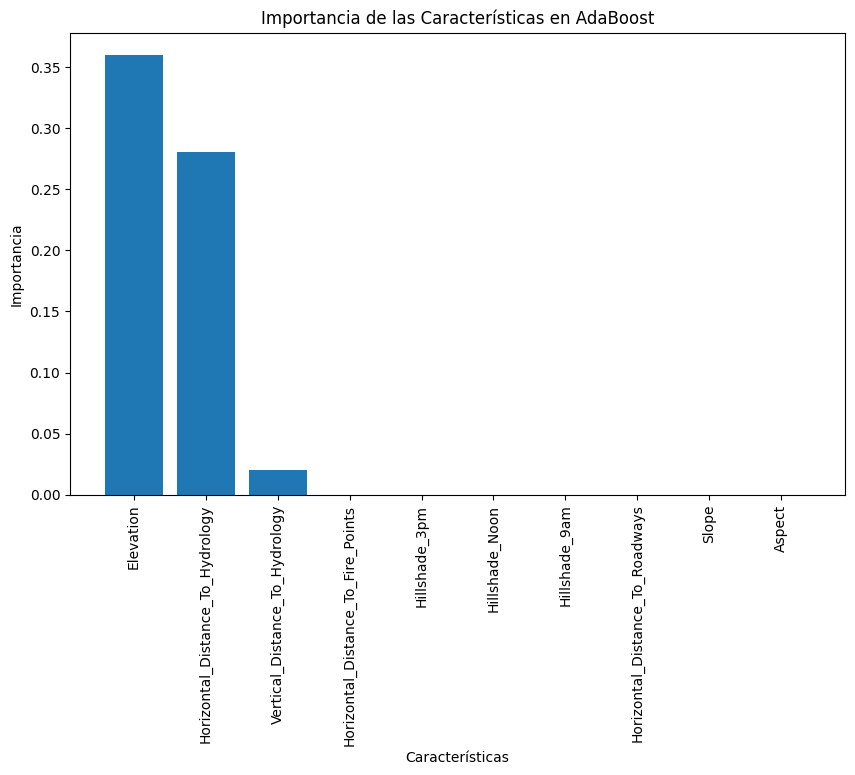

In [ ]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
importances = adaboost.feature_importances_[:10]
feature_names = X_train.columns[:10]
indices = np.argsort(importances)[::-1][:10]
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las Características en AdaBoost')
plt.show()

Ahora se muestra el primer árbol de decisión para el clasificador (son 50 árbles de decisión)

In [ ]:
from sklearn.tree import plot_tree
tree = adaboost.estimators_[1]
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=feature_names, filled=True)
plt.title('Árbol de Decisión con AdaBoost #1')
plt.show()

Para ver los 50 árboles de decisión se ejecuta la siguiente celda.

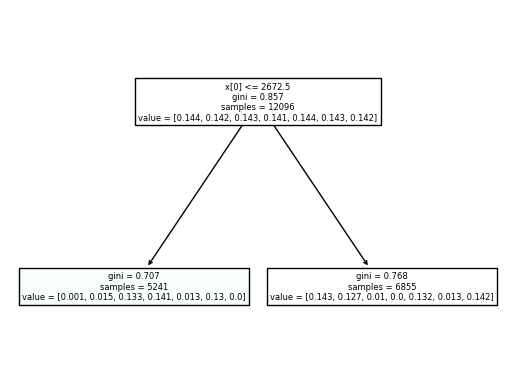

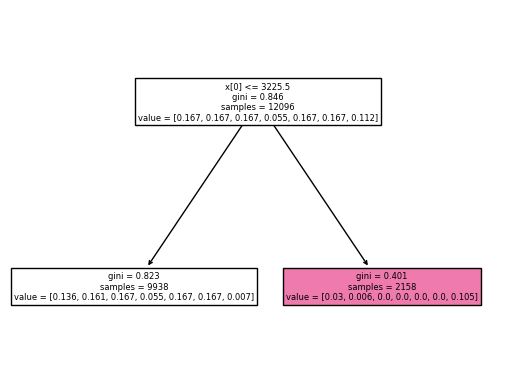

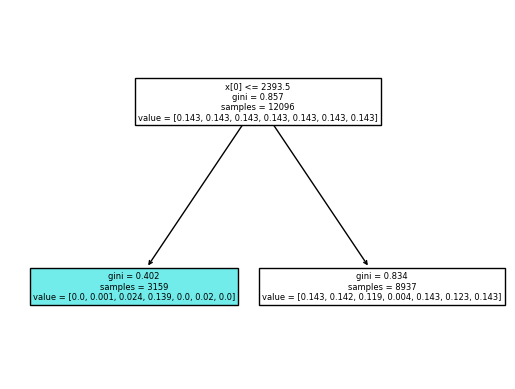

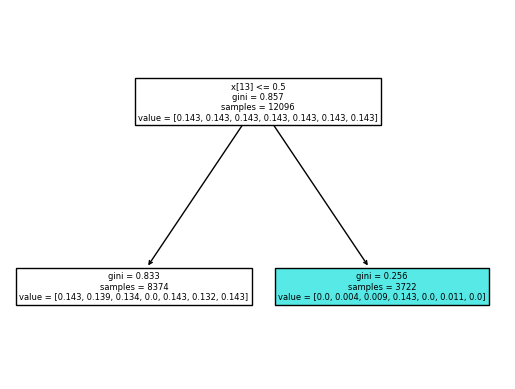

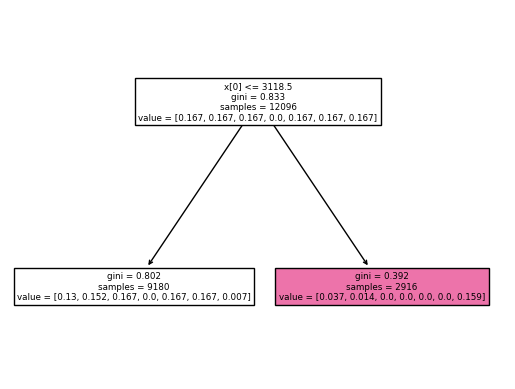

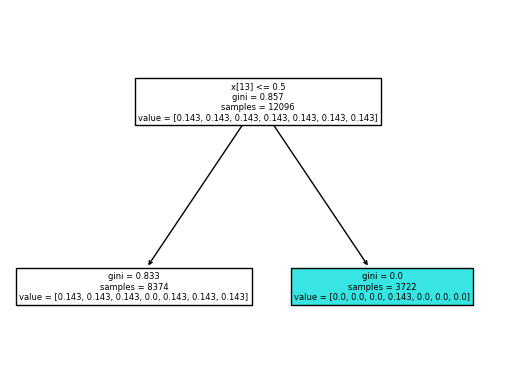

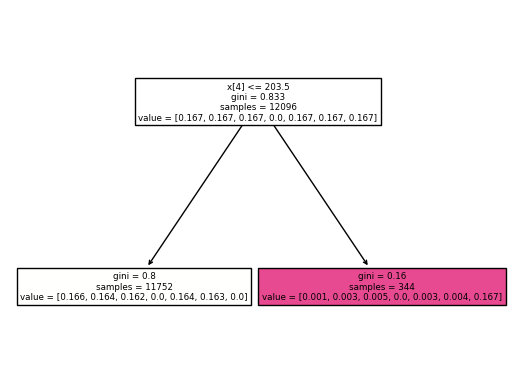

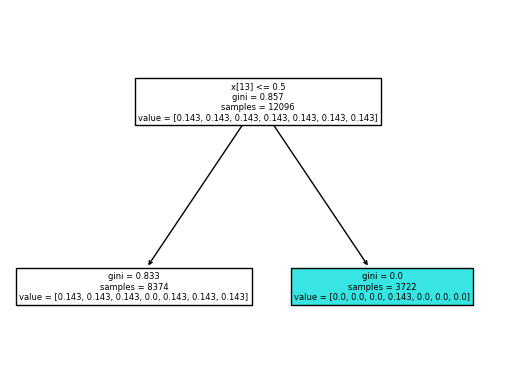

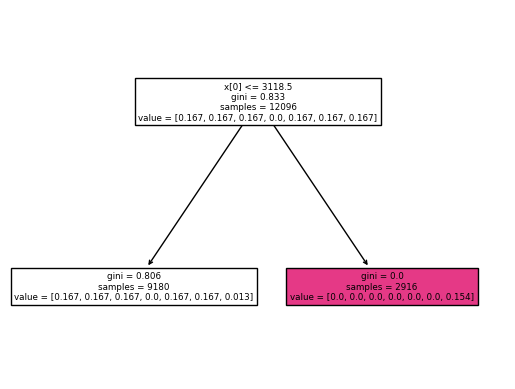

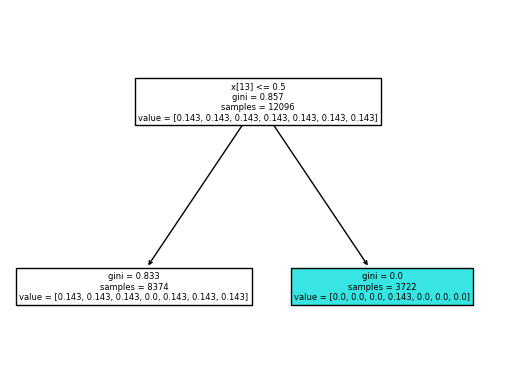

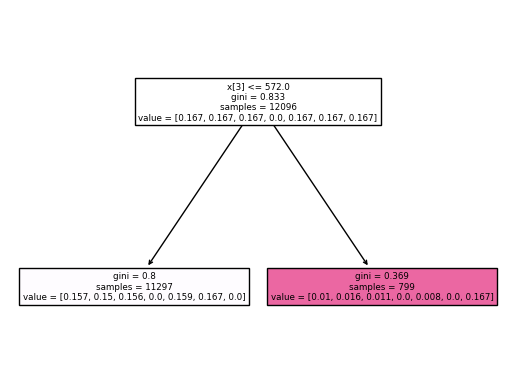

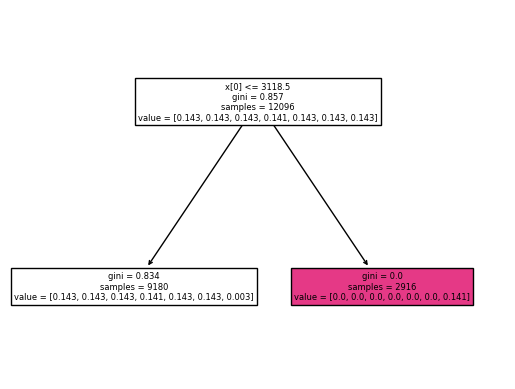

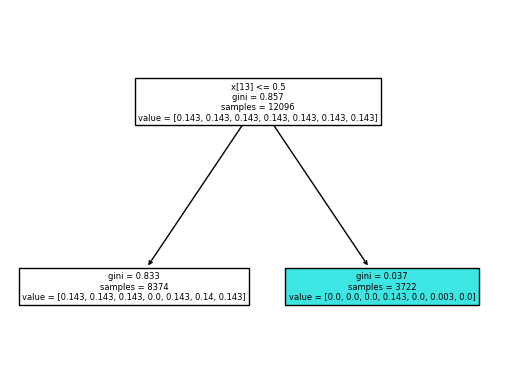

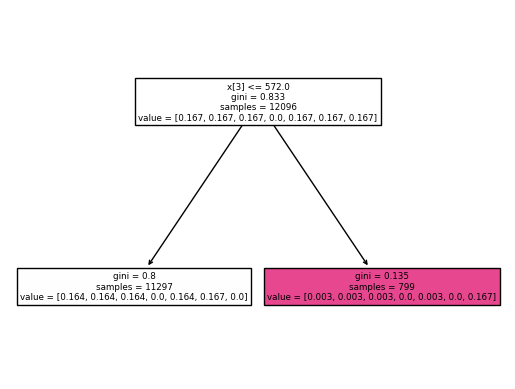

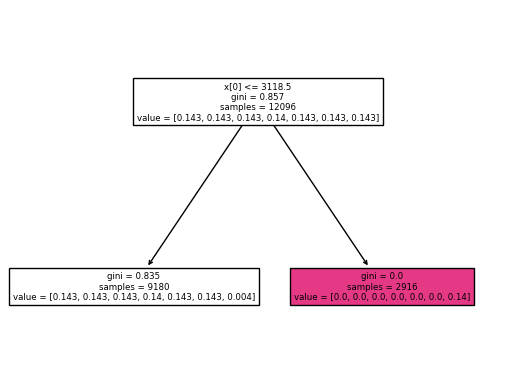

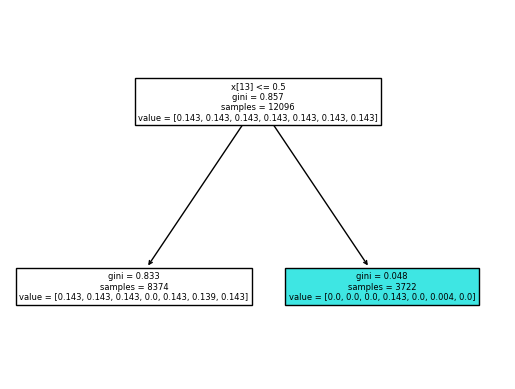

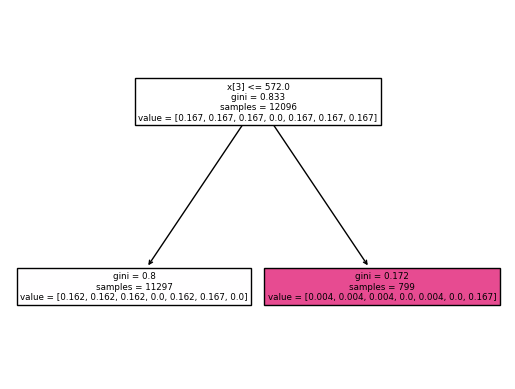

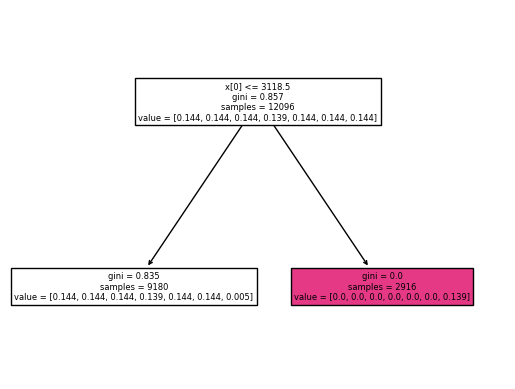

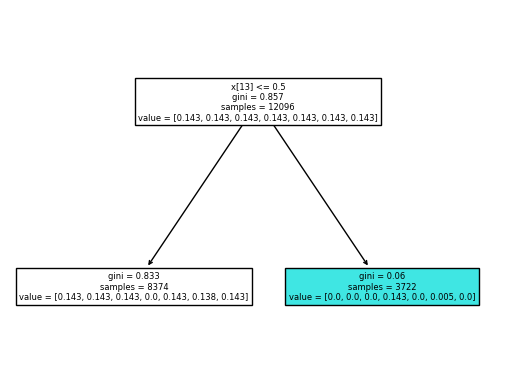

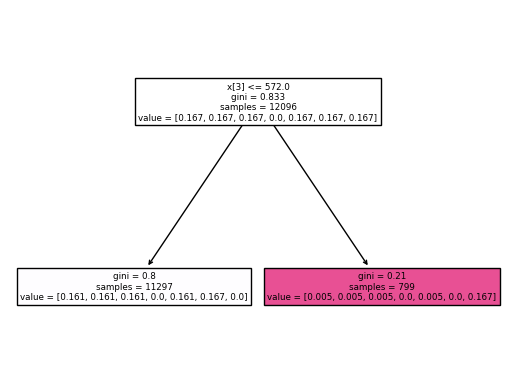

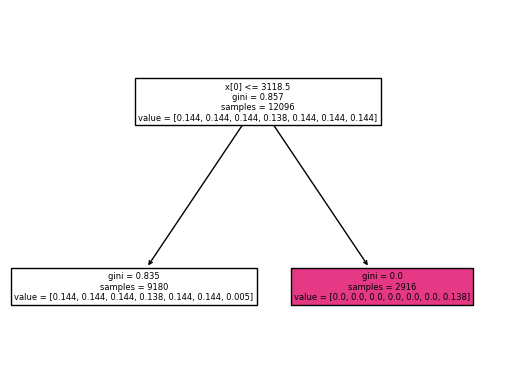

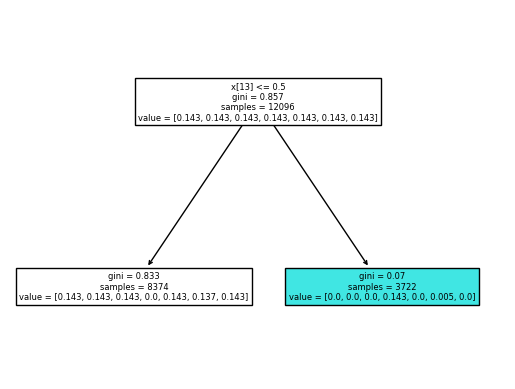

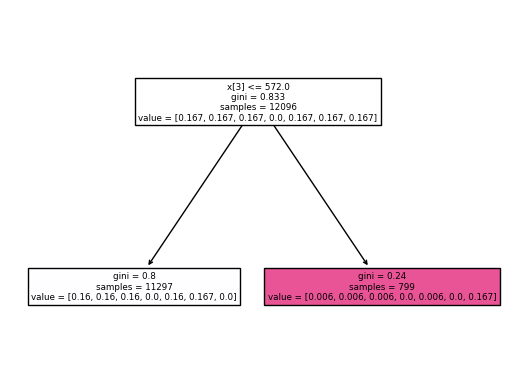

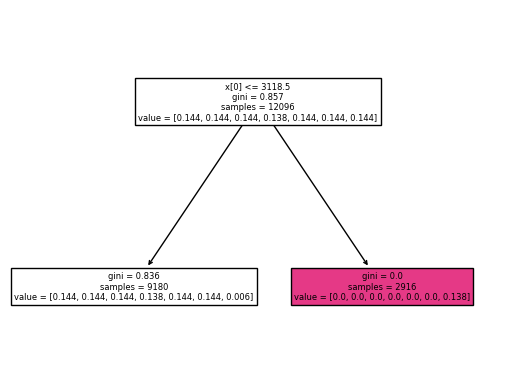

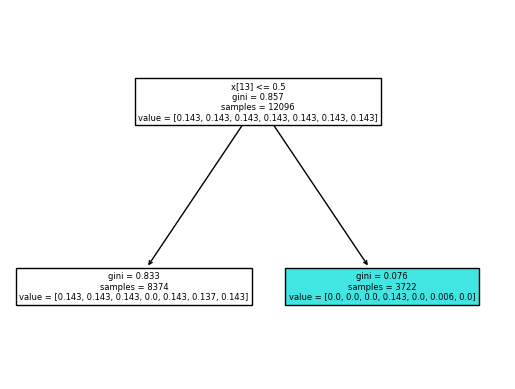

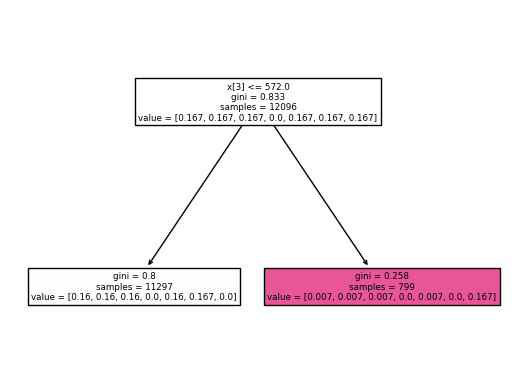

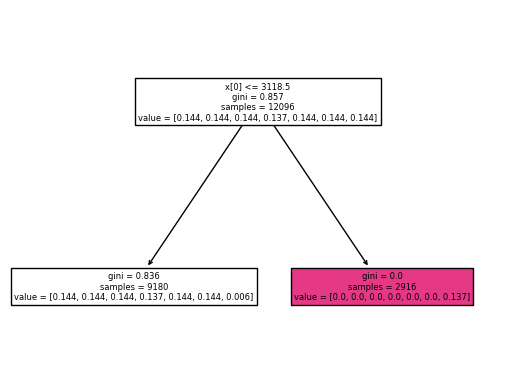

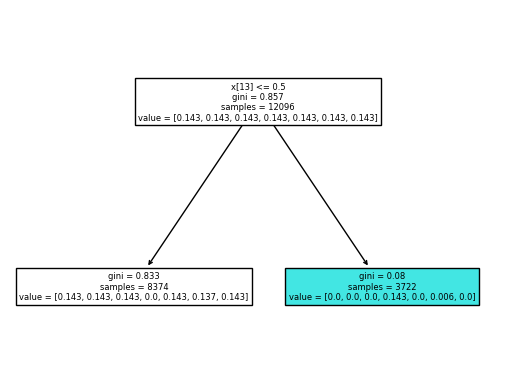

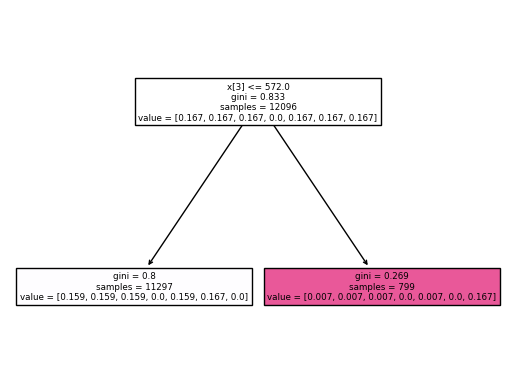

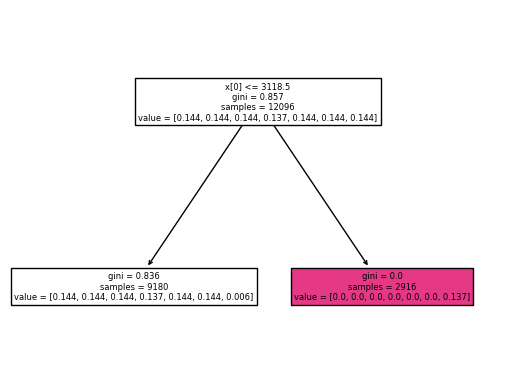

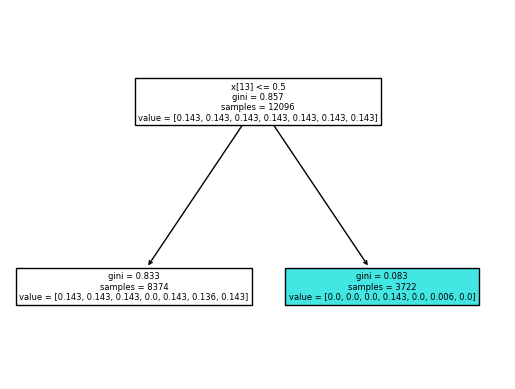

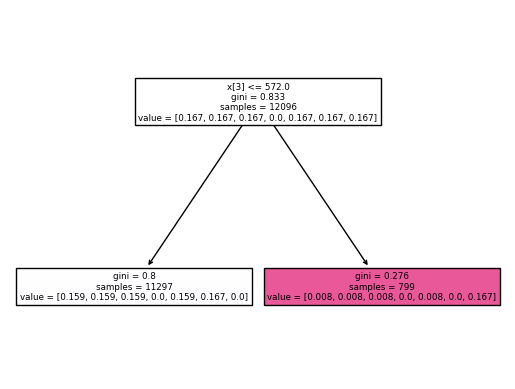

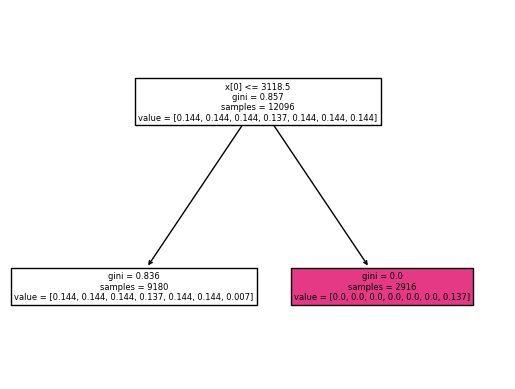

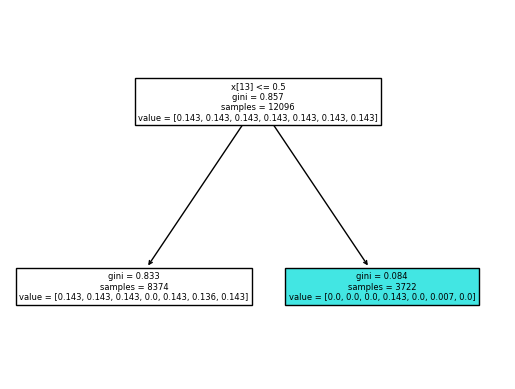

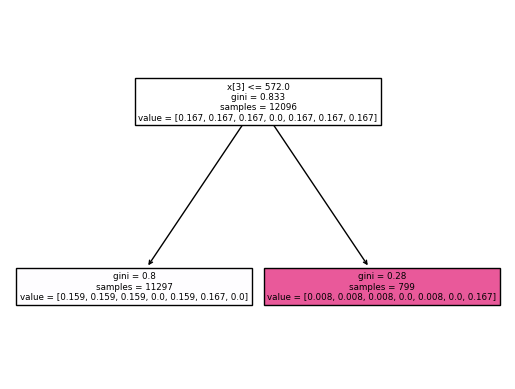

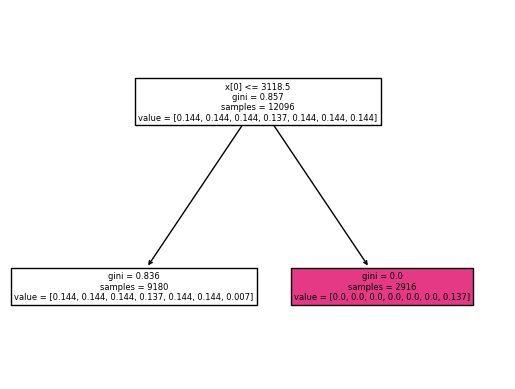

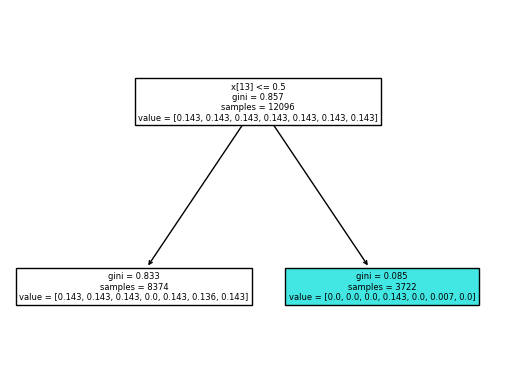

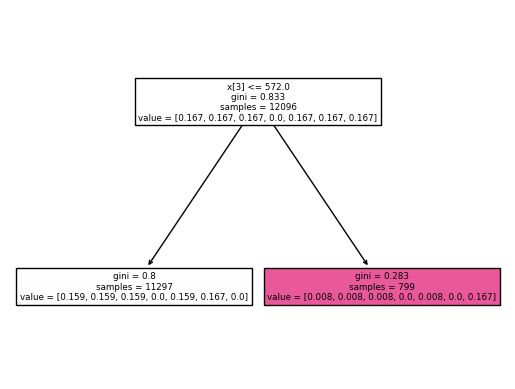

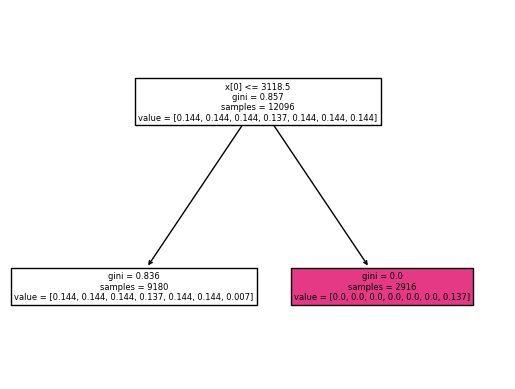

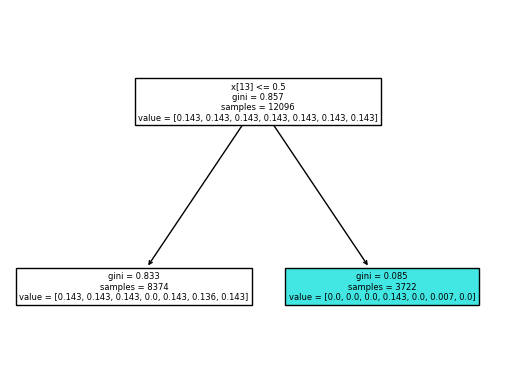

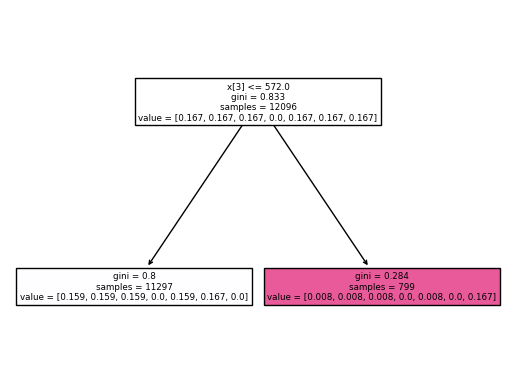

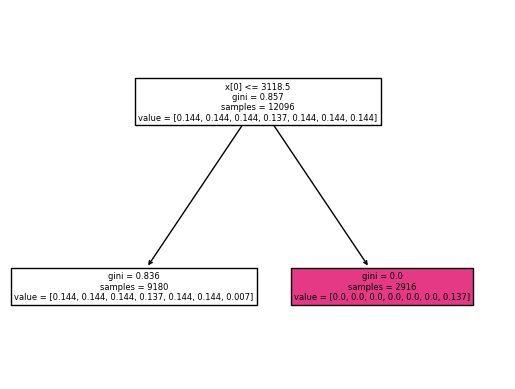

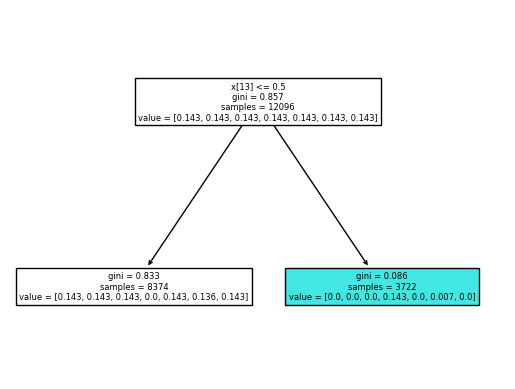

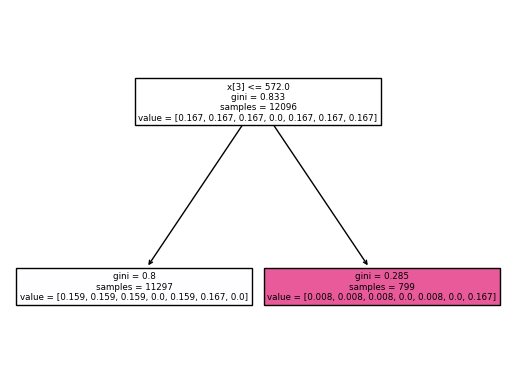

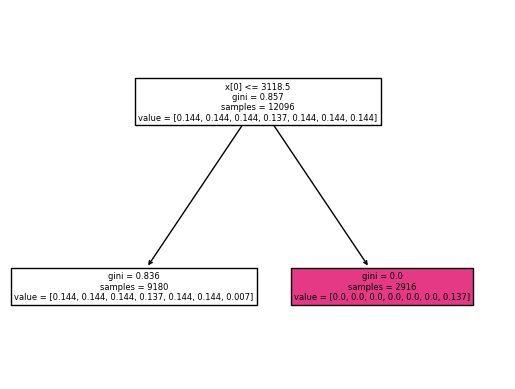

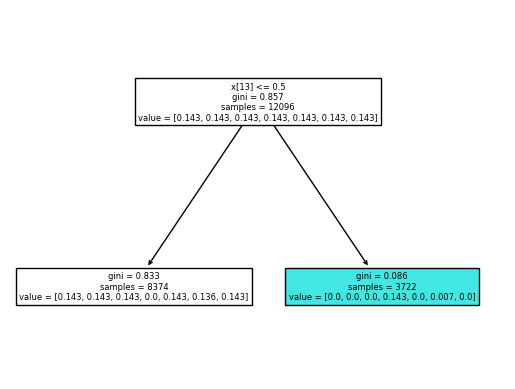

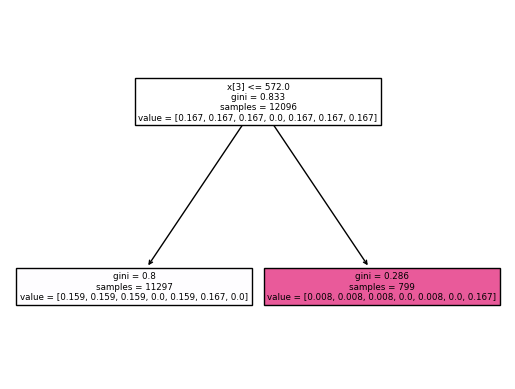

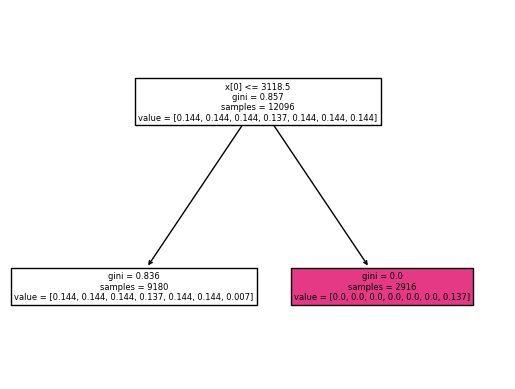

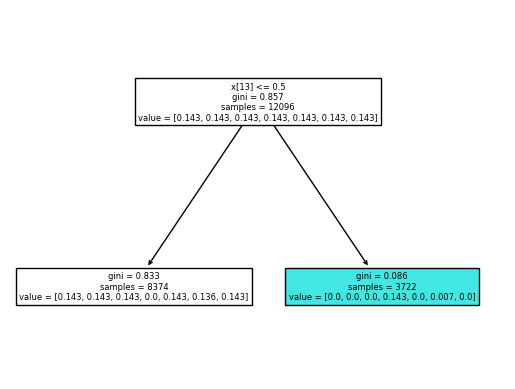

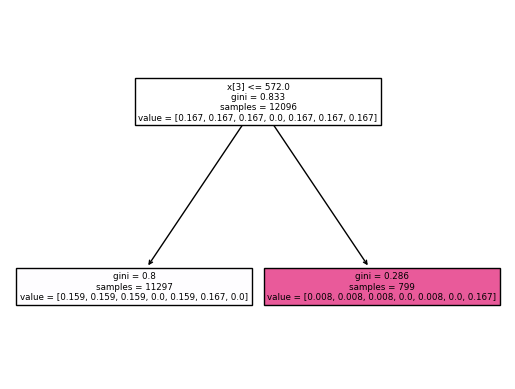

In [ ]:
for i, estimator in enumerate(adaboost.estimators_):
    plt.figure()
    plt.title(f'Árbol de decisión {i+1}')
    plot_tree(estimator, filled=True)
    plt.show()

In [ ]:
df_train=pd.read_csv("train.csv")
X=df_train.drop(["Id","Cover_Type"],axis=1)
y=df_train['Cover_Type']
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

Se reduce el tamaño de los datos, se definen los 2 algoritmos predictivos y los parámetros a encontrar, se realiza la búsqueda y se imprimen los mejores hiperparámetros de cada algoritmo.

In [ ]:
from sklearn.model_selection import GridSearchCV
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)
classifiers = {
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [50, 100],
        'max_depth': [3, 5]
    }),
    'Gradient Boosting': (GradientBoostingClassifier(), {
        'n_estimators': [50, 100],
        'learning_rate': [0.1, 0.05]
    })
}
for name, (classifier, param_grid) in classifiers.items():
    grid_search = GridSearchCV(classifier, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    print(f"Mejores hiperparámetros para {name}:")
    print(grid_search.best_params_)

Mejores hiperparámetros para Random Forest:
{'max_depth': 5, 'n_estimators': 100}
Mejores hiperparámetros para Gradient Boosting:
{'learning_rate': 0.1, 'n_estimators': 100}


Se reduce el tamaño de los datos mediante división en conjuntos de entrenamiento y prueba, se definen los algoritmos predictivos con mejores hiperparámetros encontrados en la celda anterior, se realizan las curvas de aprendizaje de los 2 algoritmos y se grafican las curvas.

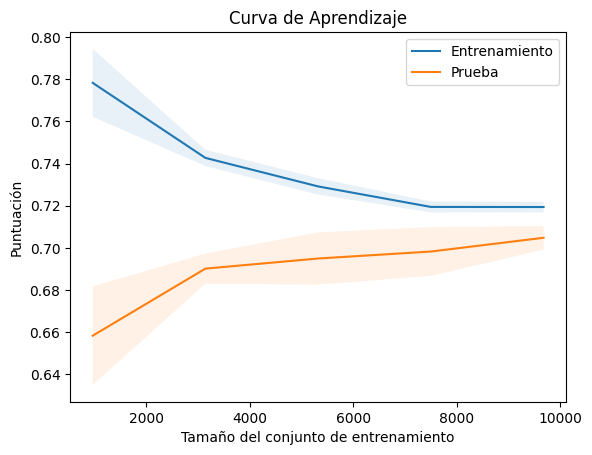

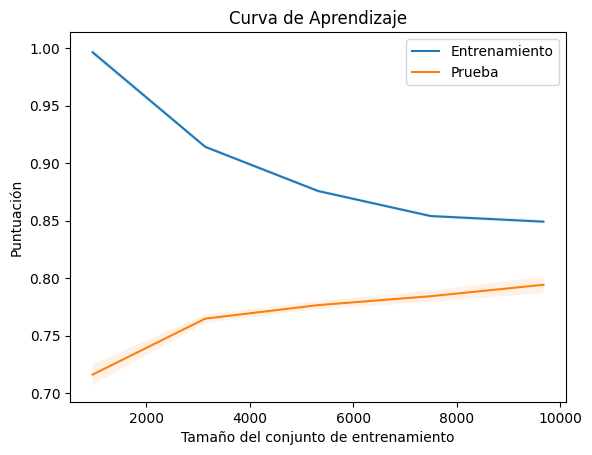

In [ ]:

from sklearn.model_selection import learning_curve
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
classifiers = [
    RandomForestClassifier(n_estimators=100, max_depth=5),
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
]
for classifier in classifiers:
    train_sizes, train_scores, test_scores = learning_curve(classifier, X_train, y_train, cv=5, n_jobs=-1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.figure()
    plt.plot(train_sizes, train_mean, label='Entrenamiento')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.plot(train_sizes, test_mean, label='Prueba')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    plt.title('Curva de Aprendizaje')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Puntuación')
    plt.legend(loc='best')
    plt.show()

 Hiperparámetros para dos combinaciones de: algoritmo no supervisado + algoritmo predictivo

In [ ]:
df_train=pd.read_csv("train.csv")
X=df_train.drop(["Id","Cover_Type"],axis=1)
y=df_train['Cover_Type']
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

Se define el modelo de PCA y Logistic Regression como un pipeline, se calculan las curvas de aprendizaje, se calculan las medias y desviaciones estándar de los puntajes y finalmente se grafica la curva de aprendizaje.

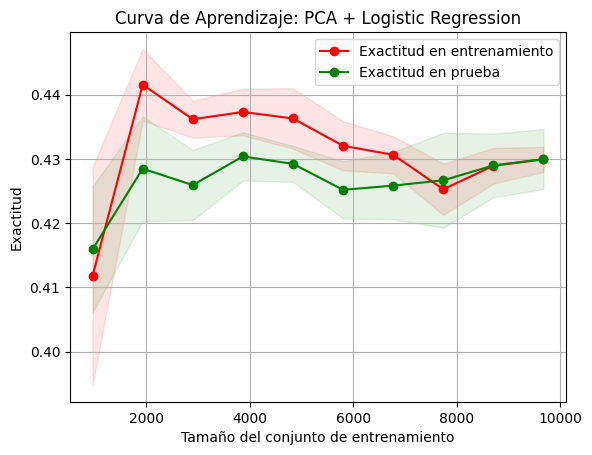

No se detecta overfitting en el modelo.


In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(max_iter=1000))
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.title('Curva de Aprendizaje: PCA + Logistic Regression')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Exactitud')
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
         label='Exactitud en entrenamiento')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
         label='Exactitud en prueba')
plt.legend(loc='best')
plt.show()
diff_scores = train_scores_mean - test_scores_mean
if np.any(diff_scores > 0.1):
    print("Se detecta overfitting en el modelo.")
else:
    print("No se detecta overfitting en el modelo.")

Ahora utilizamos PCA con SVC.

In [ ]:
df_train=pd.read_csv("train.csv")
X=df_train.drop(["Id","Cover_Type"],axis=1)
y=df_train['Cover_Type']
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

Se buscan los mejores hiperparámetros para PCA, se aplica PCA para reducir la dimensionalidad, se utiliza SVM para la clasificación y se evalúa el modelo en el conjunto de prueba.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pca = PCA()
param_grid_pca = {'n_components': [2, 3]}
grid_search_pca = GridSearchCV(pca, param_grid_pca)
grid_search_pca.fit(X_train)
best_n_components = grid_search_pca.best_params_['n_components']
pca = PCA(n_components=best_n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
svm = SVC()
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]}
grid_search_svm = GridSearchCV(svm, param_grid_svm)
grid_search_svm.fit(X_train_pca, y_train)
best_C = grid_search_svm.best_params_['C']
best_gamma = grid_search_svm.best_params_['gamma']
svm_best = SVC(C=best_C, gamma=best_gamma)
svm_best.fit(X_train_pca, y_train)
accuracy = svm_best.score(X_test_pca, y_test)
print("Mejor valor de 'n_components':", best_n_components)
print("Mejor valor de 'C':", best_C)
print("Mejor valor de 'gamma':", best_gamma)
print("Exactitud en el conjunto de prueba:", accuracy)


Mejor valor de 'n_components': 3
Mejor valor de 'C': 1
Mejor valor de 'gamma': 0.1
Exactitud en el conjunto de prueba: 1.0


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo SVM: {:.2f}".format(accuracy))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Exactitud del modelo SVM: 1.00
